In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data-export.csv')

In [3]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [4]:
# df.columns = df.iloc[0] --We can use this to make our 1 row into column headers
df.columns = ["channel group", "DateHour", "Users", "Sessions", "Engaged Sessions", "Average engagement time per session", "Engaged seassions per user", "Events per session", "Engagement rate", "Event count"]
df = df.drop(index = 0).reset_index(drop = True)

In [5]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged seassions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged Sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged seassions per user           3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [7]:
df['DateHour'] = pd.to_datetime(df['DateHour'], format= "%Y%m%d%H", errors='coerce')

In [8]:
numeric_cols = df.columns.drop(["channel group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce')
df['Hour'] = df['DateHour'].dt.hour

In [9]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged seassions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged Sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged seassions per user           3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [11]:
df.describe()

,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged seassions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


# 1. What patterns or trends can you observe in website sessions and users over time ?

In [12]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged seassions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [13]:
sns.set(style="whitegrid")

# Extra, for some practise purposes

In [14]:
# import matplotlib.dates as mdates
# group = df.groupby("DateHour")[["Sessions","Users"]].sum()

# # group.plot(figsize=(12,7))                  # 
# plt.figure(figsize=(17,7))
# sns.lineplot(data=group, x="DateHour", y="Sessions", marker="o", label="Sessions")
# sns.lineplot(data=group, x="DateHour", y="Users", marker="o", label="Users")

# ax = plt.gca()
# # Show only every 2nd hour
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=1)) 

# # Select 5 evenly spaced ticks from the index
# tick_positions = group.index[::max(1, len(group)//5)]
# ax.set_xticks(tick_positions)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))
# plt.xticks(rotation=45) 

# plt.tight_layout()
# plt.title("Sessions and Users and Time")
# plt.xlabel("DateHour")
# plt.ylabel("Count")
# plt.show()

This is the extra work i did, Where i use "Seaborn" to make lineplot with (Marker = o) and i also use the mdates to set the hour of 1 interval with tick_positions where i get the group.index evenenly from column with the evenly space between that so we can see varity in the data in a graph i also set the date using mdates.DateFormatter so that we can the date and hour with that 

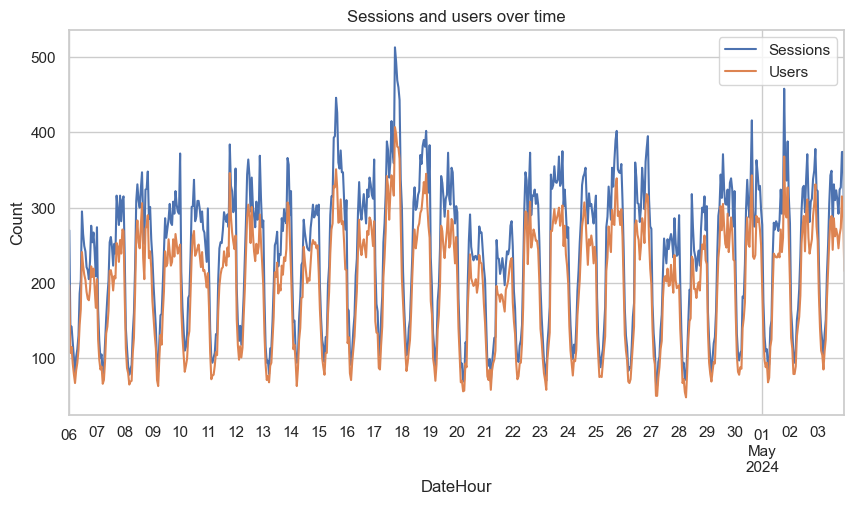

In [15]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and users over time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()

# gca = Get Current Axes
# plt.gca() is use to get current axes and to draw a graph on bases of where gca get current from it, we dont need to mention it 

# 2. Which marketing channel brought the highest number of users to the website and how can we use this insight to improve traffic from other sources?

Total users by channel

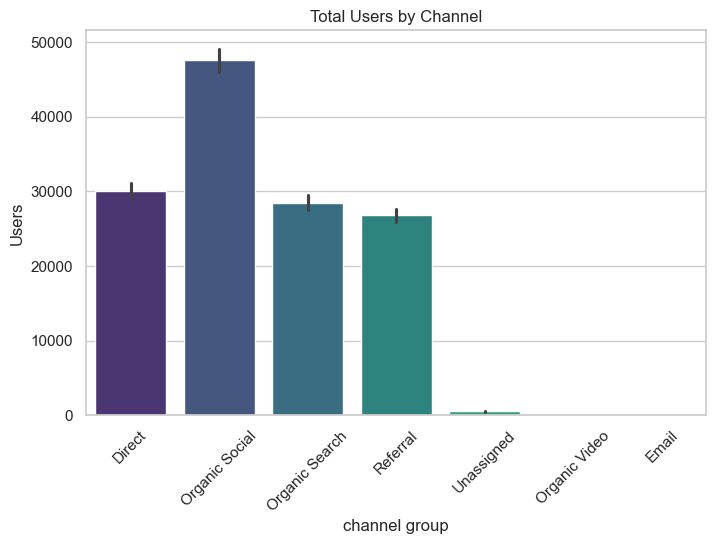

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,
            x="channel group",
            y="Users", hue="channel group",
            estimator = np.sum,
            palette="viridis")

plt.title("Total Users by Channel")
plt.xticks(rotation=45)
plt.show()

# 3. Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness?

Average Engagement time by Channel

In [17]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged seassions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


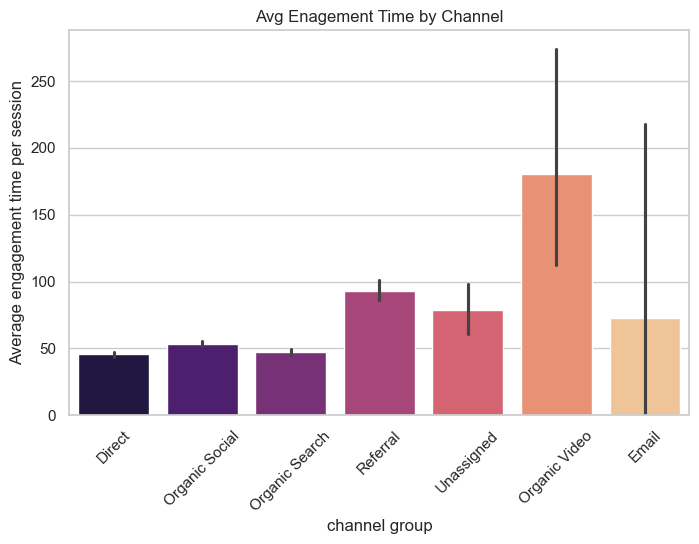

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,
            x="channel group",
            y="Average engagement time per session",
            estimator=np.mean,
            hue="channel group",
            palette="magma")

plt.title('Avg Enagement Time by Channel')
plt.xticks(rotation=45)
plt.show()

# 4. How does engagement rate vary across different traffic channels?

Engagement Rate Distribution by channel

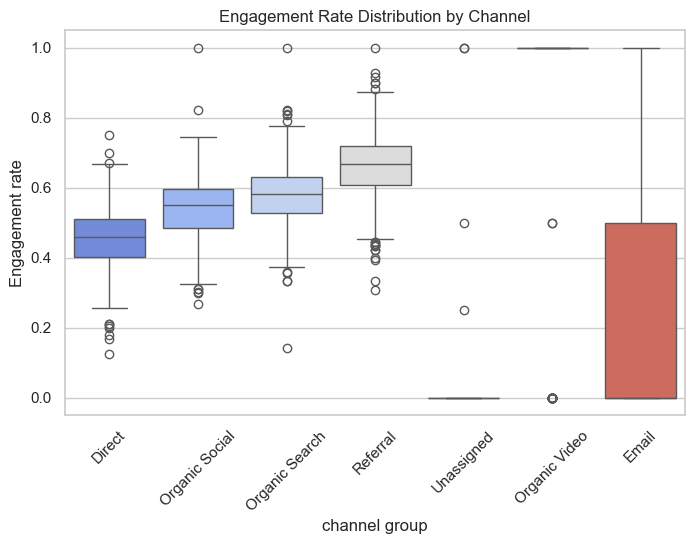

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,
            x = "channel group",
            y = "Engagement rate",
            hue = "channel group",
            palette = "coolwarm")

plt.title('Engagement Rate Distribution by Channel')
plt.xticks(rotation=45)
plt.show()

# 5. Which channels are driving more engaged sessions compared to non-engaged ones, and what stratgies can improve engagement in underperforming channels?

Engaged vs non-engaged sessions

In [20]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged seassions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [31]:
sessions_df = df.groupby("channel group")[["Sessions","Engaged Sessions"]].sum().reset_index()
sessions_df["Non-Engaged"] = sessions_df["Sessions"] - sessions_df["Engaged Sessions"]

sessions_df_melted = sessions_df.melt(                         # .Melt is use to convert the Wide format dataframes into long format datafrmaes
    id_vars="channel group", 
    value_vars=["Engaged Sessions","Non-Engaged"],
    var_name="Session Type",
    value_name="Count"
)

In [32]:
sessions_df

,channel group,Sessions,Engaged Sessions,Non-Engaged
0,Direct,37203,17243,19960
1,Email,3,1,2
2,Organic Search,33372,19425,13947
3,Organic Social,60627,32697,27930
4,Organic Video,141,109,32
5,Referral,30990,20653,10337
6,Unassigned,559,4,555


In [33]:
sessions_df_melted

,channel group,Session Type,Count
0,Direct,Engaged Sessions,17243
1,Email,Engaged Sessions,1
2,Organic Search,Engaged Sessions,19425
3,Organic Social,Engaged Sessions,32697
4,Organic Video,Engaged Sessions,109
5,Referral,Engaged Sessions,20653
6,Unassigned,Engaged Sessions,4
7,Direct,Non-Engaged,19960
8,Email,Non-Engaged,2
9,Organic Search,Non-Engaged,13947


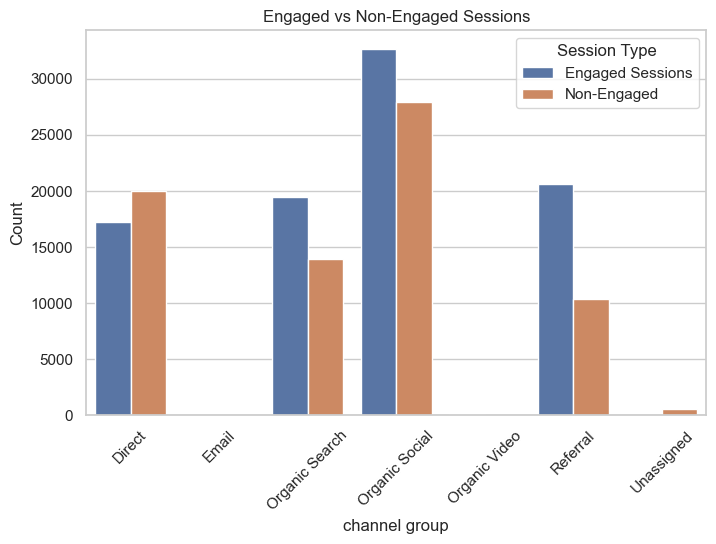

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(data=sessions_df_melted,
            x= "channel group",
            y = "Count",
            hue = "Session Type")
plt.title("Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

# 6. At what hours of the day does each channel drive the most traffic?

traffic by hour and channel

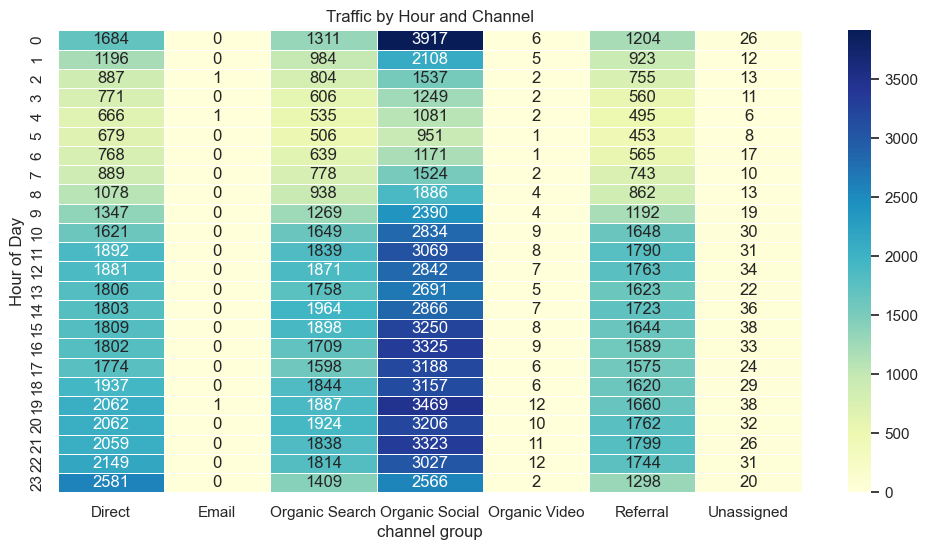

In [38]:
heatmap_date = df.groupby(["Hour","channel group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(data = heatmap_date, cmap="YlGnBu", linewidths =.5, annot = True, fmt = '.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel("channel group")
plt.ylabel("Hour of Day")
plt.show()

# 7. Is there any correlation between high traffic (sessions) and high engagement rate over time?

engagement rate vs sessions over time

In [39]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged seassions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


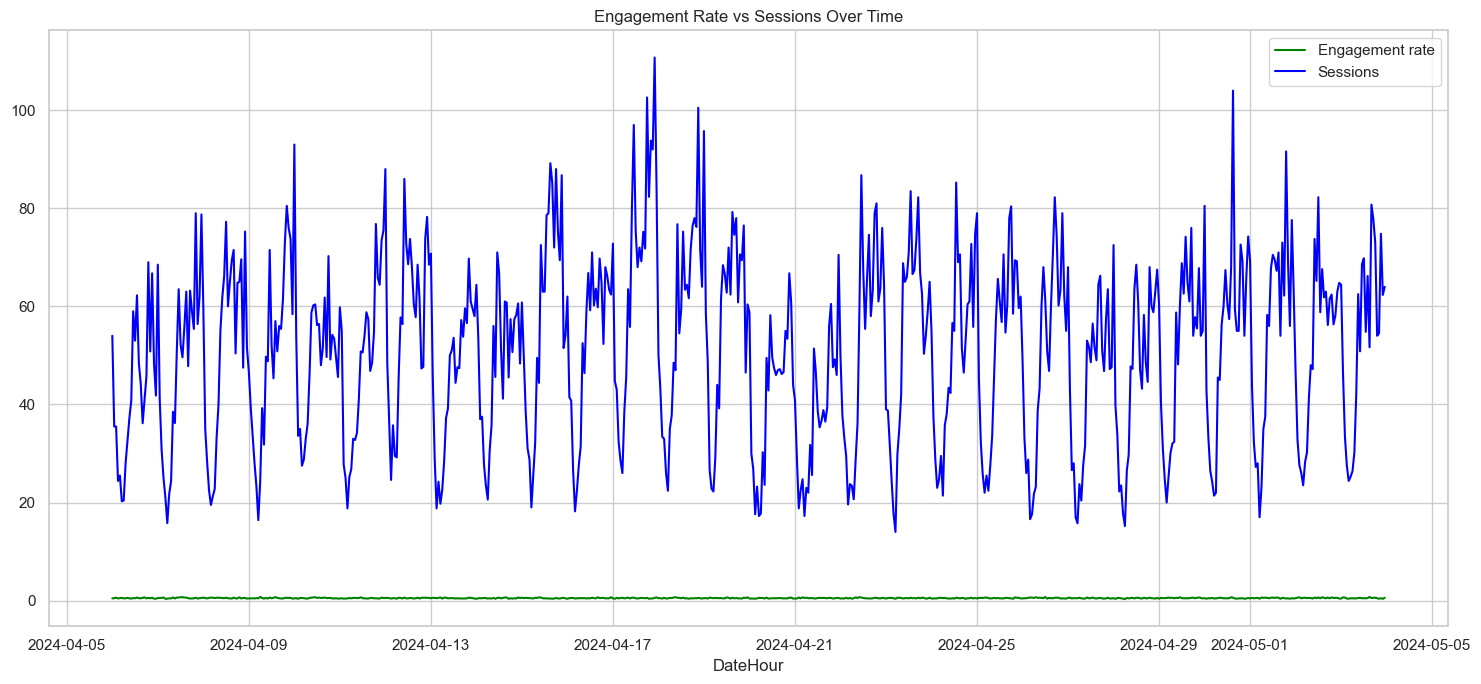

In [46]:
df_plot = df.groupby("DateHour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(15,7))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label = "Engagement rate", color = "green")
plt.plot(df_plot['DateHour'], df_plot['Sessions'], label="Sessions", color="blue")
plt.title("Engagement Rate vs Sessions Over Time")
plt.xlabel("DateHour")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

,DateHour,Engagement rate,Sessions
0,2024-04-06 00:00:00,0.450262,54.000000
1,2024-04-06 01:00:00,0.489905,35.500000
2,2024-04-06 02:00:00,0.595759,35.500000
3,2024-04-06 03:00:00,0.446725,24.400000
4,2024-04-06 04:00:00,0.494964,25.500000
...,...,...,...
667,2024-05-03 19:00:00,0.498125,54.000000
668,2024-05-03 20:00:00,0.375790,54.500000
669,2024-05-03 21:00:00,0.471312,74.800000
670,2024-05-03 22:00:00,0.367749,62.333333
